# Engenharia de Software para Ciência de Dados - PUC-Rio

### Problemas de Classificação
Marcos Kalinowski e Tatiana Escovedo

Apoio: Hugo Villamizar

# Nosso primeiro modelo de classificação simplificado

In [1]:
# Imports necessários
import pandas as pd
from sklearn.datasets import load_iris # para importar o dataset iris
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.svm import SVC # para utilizar o algoritmo SVM

# Carga do dataset
iris = load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names) # conversão para dataframe
dataset['target'] = iris.target # adição da coluna target

# Separação em bases de treino e teste
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

# Criação do modelo e predições
model = SVC() # cria o modelo
model.fit(X_train, Y_train) # treina o modelo com o dataset de treino
predictions = model.predict(X_test) # faz as predições com o dataset de teste

# Avaliação das predições
print(accuracy_score(Y_test, predictions)) # acurácia
print(confusion_matrix(Y_test, predictions)) # matriz de confusão

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


# Problemas de classificação passo a passo

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # holdout
from sklearn.model_selection import KFold # validação cruzada
from sklearn.model_selection import cross_val_score # validação cruzada
from sklearn.model_selection import GridSearchCV # grid search
from sklearn.metrics import classification_report # relatório de classificação
from sklearn.metrics import confusion_matrix # matriz de confusão
from sklearn.metrics import accuracy_score # acurácia
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.tree import DecisionTreeClassifier # árvore de classificação
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.linear_model import LogisticRegression # regressão logística
from sklearn.svm import SVC # svm
from sklearn.pipeline import Pipeline # pipeline

## Carga do dataset

In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# ignorando future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Informa o cabeçalho das colunas
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

# Exibe as primeiras linhas
dataset.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Particionamento em conjuntos de treino e teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
# separando os atributos e a classe do dataset
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

# definindo o tamanho do conjunto de teste
test_size = 0.20 

# A semente (seed) pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
# Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
seed = 7

# particionando em conjuntos de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


## Modelos de Classificação

* Validação Cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
* Métricas de avaliação: http://scikit-learn.org/stable/modules/model_evaluation.html

In [6]:

# definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'
# scoring = 'roc_auc'

num_particoes = 10 # número de folds da validação cruzada

kfold = KFold(n_splits=num_particoes)

### KNN

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [7]:
model = KNeighborsClassifier()
print(model.get_params()) # imprime os parâmetros do modelo
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions)) # acurácia

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.7101533580116342
0.7077922077922078


Vamos agora experimentar variar alguns dos parâmetros do modelo.

In [8]:
# criação de outro modelo alterando o tipo de distância
model = KNeighborsClassifier(metric = 'manhattan')
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.7216552088841882


In [9]:
# criação de outro modelo alterando o valor de k
model = KNeighborsClassifier(n_neighbors = 7)
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.718244315177155


### Árvore de Classificação

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [10]:
model = DecisionTreeClassifier(random_state=seed)
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'best'}
0.6758593336858805


Também é possível especificar valores para os parâmetros da árvore de classificação:

In [11]:
# criando o modelo já com os parâmetros desejados
model = DecisionTreeClassifier(max_depth = 3, # profundidade máxima - inteiro ou "None" (sem limite). Valores muito altos podem causar overviffing e muito baixos, underfitting.
                             criterion = 'entropy', # critério de medição de qualidade de um particionamento {“gini”, “entropy”}, default=”gini”
                             random_state=seed) # semente aleatória
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'best'}
0.7426493918561607


### Naive Bayes 

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [12]:
model = GaussianNB()
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'priors': None, 'var_smoothing': 1e-09}
0.7508196721311474


### Support Vector Machines

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

http://scikit-learn.org/stable/modules/svm.html

In [13]:
model = SVC()
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.7572712850343732


In [14]:
model = SVC(kernel = 'linear')
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
0.7768376520359598


### Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
model = LogisticRegression()
print(model.get_params())
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(results.mean())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
0.7800634584875727


## Comparando o desempenho dos modelos

KNN: 0.710153 (0.064599)
CART: 0.687335 (0.052398)
NB: 0.750820 (0.050575)
SVM: 0.757271 (0.047915)
LR: 0.780063 (0.054981)


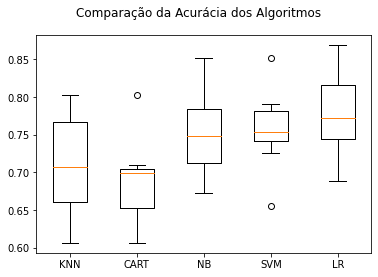

In [16]:
# https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/ #criando varios modelos para compará-los na acurácia
np.random.seed(seed) # definindo uma seed global

# preparando os modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))

# avaliando os modelos
results = []
names = []
scoring = 'accuracy'
folds = 10
kfold = KFold(n_splits=folds)

for name, model in models: # para cada modelo da lista de modelo executa e adiciona o resultado na lista
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Algoritmos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

## Comparando o desempenho dos modelos com Pipelines - Dados Padronizados e Normalizados

Para evitar o *data leakage* quando usamos validação cruzada, precisamos garantir que o método de preparação de dados seja preparado no conjunto de treinamento e aplicado nos conjuntos de treino e teste dentro do procedimento de validação cruzada, ou seja, a cada combinação de *folds*. Para tal, podemos definir um *pipeline*, um objeto que define uma sequência de etapas de preparação de dados em cadeia, e que finaliza com um estimador (modelo) a ser treinado e avaliado.

*   Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html



ScaledKNN: 0.718297 (0.071563)
ScaledCART: 0.684082 (0.052059)
ScaledNB: 0.750820 (0.050575)
ScaledSVM: 0.752565 (0.064295)
ScaledLR: 0.778424 (0.061895)
NormKNN: 0.718271 (0.072688)
NormCART: 0.674194 (0.044356)
NormNB: 0.750820 (0.050575)
NormSVM: 0.747594 (0.071499)
NormLR: 0.765362 (0.066363)


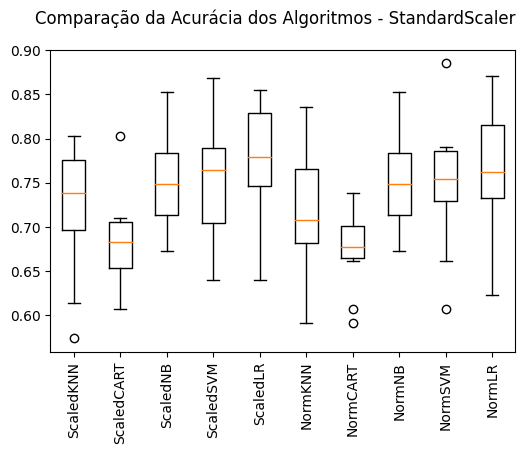

ScaledKNN: 0.727273
ScaledCART: 0.746753
ScaledNB: 0.753247
ScaledSVM: 0.798701
ScaledLR: 0.785714
NormKNN: 0.727273
NormCART: 0.766234
NormNB: 0.753247
NormSVM: 0.798701
NormLR: 0.785714


In [ ]:
np.random.seed(seed) # definindo uma seed global

# pipeline simples
#steps = list()
#steps.append(('scaler', MinMaxScaler()))
#steps.append(('model', LogisticRegression()))
#pipeline = Pipeline(steps=steps)

# Pipelines para padronização/normalização do dataset e aplicação do modelo
pipelines = []
# Dados padronizados
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
# Dados normalizados 
pipelines.append(('NormKNN', Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('NormCART', Pipeline([('MinMaxScaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NormNB', Pipeline([('MinMaxScaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('NormSVM', Pipeline([('MinMaxScaler', MinMaxScaler()),('SVM', SVC())])))
pipelines.append(('NormLR', Pipeline([('MinMaxScaler', MinMaxScaler()),('LR', LogisticRegression())])))

results = []
names = []

# Aplicação dos pipelines
for name, model in pipelines:
  kfold = KFold(n_splits=folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot de comparação dos algoritmos
fig = plt.figure(dpi=100) 
fig.suptitle('Comparação da Acurácia dos Algoritmos - StandardScaler') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

results = []
names = []

for name, model in pipelines:
  model.fit(X_train, Y_train)
  predictions = model.predict(X_test)
  acc = accuracy_score(Y_test, predictions)
  results.append(acc)
  names.append(name)
  msg = "%s: %f" % (name, acc)
  print(msg)



## Otimizando os Hiperparâmetros com GridSearch

 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# Tuning do KNN

# hiperparâmetros que serão avaliados
k = [1,3,5,7,9,11,13,15,17,19,21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

# modelo
model = KNeighborsClassifier()

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.747488 usando {'metric': 'manhattan', 'n_neighbors': 13}
0.672871 (0.074398): {'metric': 'euclidean', 'n_neighbors': 1}
0.685722 (0.069709): {'metric': 'euclidean', 'n_neighbors': 3}
0.710153 (0.064599): {'metric': 'euclidean', 'n_neighbors': 5}
0.718244 (0.057034): {'metric': 'euclidean', 'n_neighbors': 7}
0.726520 (0.058677): {'metric': 'euclidean', 'n_neighbors': 9}
0.729640 (0.054824): {'metric': 'euclidean', 'n_neighbors': 11}
0.744236 (0.064885): {'metric': 'euclidean', 'n_neighbors': 13}
0.741010 (0.061095): {'metric': 'euclidean', 'n_neighbors': 15}
0.732866 (0.048207): {'metric': 'euclidean', 'n_neighbors': 17}
0.732893 (0.041578): {'metric': 'euclidean', 'n_neighbors': 19}
0.739291 (0.062642): {'metric': 'euclidean', 'n_neighbors': 21}
0.669487 (0.065163): {'metric': 'manhattan', 'n_neighbors': 1}
0.695452 (0.054305): {'metric': 'manhattan', 'n_neighbors': 3}
0.721655 (0.054627): {'metric': 'manhattan', 'n_neighbors': 5}
0.723295 (0.055170): {'metric': 'manhattan', 

In [ ]:
# Tuning do SVM

# hiperparâmetros que serão avaliados
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

# modelo
model = SVC()

# busca exaustiva de hiperparâmetros com GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

# imprime o melhor resultado
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

# imprime todos os resultados
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.776838 usando {'C': 0.5, 'kernel': 'linear'}
0.771920 (0.053452): {'C': 0.1, 'kernel': 'linear'}
0.745822 (0.042116): {'C': 0.1, 'kernel': 'poly'}
0.654654 (0.045429): {'C': 0.1, 'kernel': 'rbf'}
0.656293 (0.044581): {'C': 0.1, 'kernel': 'sigmoid'}
0.771946 (0.052314): {'C': 0.3, 'kernel': 'linear'}
0.747409 (0.041031): {'C': 0.3, 'kernel': 'poly'}
0.750740 (0.042312): {'C': 0.3, 'kernel': 'rbf'}
0.625410 (0.044987): {'C': 0.3, 'kernel': 'sigmoid'}
0.776838 (0.061751): {'C': 0.5, 'kernel': 'linear'}
0.750661 (0.050860): {'C': 0.5, 'kernel': 'poly'}
0.752380 (0.041574): {'C': 0.5, 'kernel': 'rbf'}
0.550582 (0.049581): {'C': 0.5, 'kernel': 'sigmoid'}
0.776838 (0.061751): {'C': 0.7, 'kernel': 'linear'}
0.755605 (0.050020): {'C': 0.7, 'kernel': 'poly'}
0.749075 (0.043331): {'C': 0.7, 'kernel': 'rbf'}
0.529350 (0.049209): {'C': 0.7, 'kernel': 'sigmoid'}
0.776838 (0.055808): {'C': 0.9, 'kernel': 'linear'}
0.750740 (0.052580): {'C': 0.9, 'kernel': 'poly'}
0.758884 (0.047093): {'C': 

Podemos ver que a configuração que alcançou a maior acurácia foi o modelo que utilizou kernel linear e C = 0,5. Esta acurácia é a mais alta que conseguimos até o momento.

## Fazendo as predições

In [ ]:
np.random.seed(seed) # definindo uma seed global 

# criando um modelo com a melhor configuração até o momento
model = SVC(C=0.5, kernel='linear')
model.fit(X_train, Y_train)

# predição
predictions = model.predict(X_test)

# estimando a acurácia no conjunto de teste
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.7922077922077922
[[90  7]
 [25 32]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        97
         1.0       0.82      0.56      0.67        57

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.76       154
weighted avg       0.80      0.79      0.78       154



In [ ]:
print(Y_test)

[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]


In [ ]:
print(predictions)

[0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
